In [66]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import time
import random

HEADERS = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64)",
}

# List of keywords/categories
keywords = [
    "ableton launchpad", "fabric dye kit", "ear wrap", "jeans adjustable hook", "tie dye kit",
    "mismatched shoes", "Embroidery Kits", "DIY", "patches", "clothing stamp"
]

def get_amazon_urls(keyword, max_pages=2):
    urls = []
    for page in range(1, max_pages + 1):
        search_url = f"https://www.flipkart.com/s?k={keyword.replace(' ', '+')}&page={page}"
        response = requests.get(search_url, headers=HEADERS)
        soup = BeautifulSoup(response.content, "html.parser")
        for a_tag in soup.select("a.a-link-normal.s-no-outline"):
            href = a_tag.get("href")
            if href and "/dp/" in href:
                full_url = "https://www.flipkart.com" + href.split("?")[0]
                if full_url not in urls:
                    urls.append(full_url)
        time.sleep(random.uniform(1, 2))  # Be polite
    return urls

# Collect URLs
all_urls = []
for keyword in keywords:
    print(f"Searching: {keyword}")
    urls = get_amazon_urls(keyword, max_pages=2)
    all_urls.extend([{"keyword": keyword, "url": u} for u in urls])

# Limit to 50
all_urls = all_urls[:50]

# Save to CSV
df = pd.DataFrame(all_urls)
df.to_csv("flip_product_urlsc.csv", index=False)
print("Saved 50 product URLs to 'amazon_product_urls.csv'")


Searching: ableton launchpad
Searching: fabric dye kit
Searching: wireless earbuds
Searching: power bank
Searching: tie dye kit
Searching: Resin Art Kits
Searching: Embroidery Kits
Searching: DIY
Searching: phone tripod
Searching: paint markers
Saved 50 product URLs to 'amazon_product_urls.csv'


In [525]:
#gathering various URL from ecommerce websites for random products from amazon ebay snapdeal so model dosent get biased

In [64]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import time
import random

BASE_URL = "https://en.wikipedia.org/wiki/Special:Random"
HEADERS = {"User-Agent": "Mozilla/5.0"}

def get_reference_urls_from_page(url):
    try:
        res = requests.get(url, headers=HEADERS, timeout=10)
        soup = BeautifulSoup(res.text, "html.parser")
        refs = set()
        for cite in soup.select("cite a.external, li[id^='cite_note'] a.external"):
            href = cite.get("href")
            if href and href.startswith("http"):
                refs.add(href)
        return refs
    except Exception as e:
        print(f"❌ Error on {url}: {e}")
        return set()

# Main loop to collect references
collected_refs = set()
attempts = 0

while len(collected_refs) < 500 and attempts < 2000:
    attempts += 1
    try:
        r = requests.get(BASE_URL, headers=HEADERS, allow_redirects=True, timeout=10)
        real_url = r.url
        print(f"🔎 Scraping: {real_url}")
        refs = get_reference_urls_from_page(real_url)
        collected_refs.update(refs)
    except Exception as e:
        print(f"Error: {e}")
    time.sleep(random.uniform(0.8, 1.5))

# Save to CSV
final_refs = list(collected_refs)[:500]
df = pd.DataFrame(final_refs, columns=["reference_url"])
df.to_csv("wikipedia_reference_urls.csv", index=False)
print("✅ Done: Saved 500 reference URLs to wikipedia_reference_urls.csv")


🔎 Scraping: https://en.wikipedia.org/wiki/Llimoniella
🔎 Scraping: https://en.wikipedia.org/wiki/Hazard_H._Sheldon_House
🔎 Scraping: https://en.wikipedia.org/wiki/1998_Montana_Grizzlies_football_team
🔎 Scraping: https://en.wikipedia.org/wiki/Erich_Gritzner
🔎 Scraping: https://en.wikipedia.org/wiki/Glencree_German_war_cemetery
🔎 Scraping: https://en.wikipedia.org/wiki/Schistophoron
🔎 Scraping: https://en.wikipedia.org/wiki/Crescent_Porter_Hale
🔎 Scraping: https://en.wikipedia.org/wiki/Sam_Mort
🔎 Scraping: https://en.wikipedia.org/wiki/Juho_Kananen
🔎 Scraping: https://en.wikipedia.org/wiki/Houghton_Bank
🔎 Scraping: https://en.wikipedia.org/wiki/Kolp,_Vladimir_Oblast
🔎 Scraping: https://en.wikipedia.org/wiki/Sam_Schachter
🔎 Scraping: https://en.wikipedia.org/wiki/Bathampton_railway_station
🔎 Scraping: https://en.wikipedia.org/wiki/Kansas_State_Wildcats_football
🔎 Scraping: https://en.wikipedia.org/wiki/Ph%C3%BA_Hi%E1%BB%87p,_An_Giang
🔎 Scraping: https://en.wikipedia.org/wiki/Podawce
🔎 Scra

In [ ]:
#collected random url so same number 500 for ecommerce and 500 others

In [27]:
urls8 = urls8.assign(keyword='others')

In [3]:
import pandas as pd
#link=pd.concat(fm)

In [73]:
urls5 = urls5.rename(columns={'url': 'URL','name':'keyword'})

In [85]:
urls4['keyword'] = urls4['product_url'].apply(lambda x: x.rstrip('/').split('/')[-1])


In [81]:
frames=[urls1,urls2,urls3,urls4,urls5,urls8]
finaldf = pd.concat(frames)

In [83]:
finaldf

,keyword,URL
0,travel mug,https://amazon.in/Borosil-Hydra-Stainless-Stee...
1,travel mug,https://amazon.in/Tlater-Insulated-Leakproof-R...
2,travel mug,https://amazon.in/XMART-INDIA-Insulated-Coffee...
3,travel mug,https://amazon.in/Wosta-Insulated-Fat-Bottomed...
4,travel mug,https://amazon.in/Wosta-Insulated-Leakproof-In...
...,...,...
495,others,https://www.newspapers.com/article/great-falls...
496,others,https://heartofasia.af/unicef-13m-afghan-child...
497,others,https://olympics.com/en/athletes/fay-moulton
498,others,http://www.cempra.com/research/antibacterials/


In [ ]:
#final DF in which we will work in

In [87]:
finaldf['URL'] = finaldf['URL'].str.replace(" ", "")

In [101]:
finaldf['keyword'].value_counts()


keyword
others                                                                        500
Air Fresheners                                                                 96
fabric dye kit                                                                 70
travel mug                                                                     50
ableton launchpad                                                              30
                                                                             ... 
Forbro - Maroon Nylon Regular Fit Men's Windcheater Jacket ( Pack of 1 )        1
Forbro - Olive Nylon Regular Fit Men's Windcheater Jacket ( Pack of 1 )         1
Uzarus - Cotton Blend Relaxed Fit Maroon Men's Casual Jacket ( Pack of 1 )      1
srp tiger USB PENDRIVE 128GB Pen Drive ( 128GB )                                1
ASIAN THUNDER-07 Beige Men's Sneakers                                           1
Name: count, Length: 244, dtype: int64

In [25]:
import pandas as pd
from urllib.parse import urlparse, unquote
import re



# Step 1: Strip spaces, drop blanks or non-http URLs
url['URL'] = url['URL'].astype(str).str.strip()
url = url[url['URL'].str.startswith(('http://', 'https://'))]

# Step 2: Parse domain and product keyword
def extract_info(link):
    try:
        parsed = urlparse(link)
        domain = parsed.netloc.replace('www.', '')  # clean domain
        path = unquote(parsed.path)  # decode URL-encoded parts
        # Extract product keyword: usually the longest segment in path
        product_candidates = [seg for seg in path.split('/') if seg and not re.search(r'[\d]{5,}', seg)]
        product = max(product_candidates, key=len) if product_candidates else None
        return pd.Series([domain, product])
    except:
        return pd.Series([None, None])

url[['website', 'keyword']] = url['URL'].apply(extract_info)

# Final cleaned DataFrame
url.reset_index(drop=True, inplace=True)
print(url)


                                               keyword  \
0                 Borosil-Hydra-Stainless-Steel-Bottle   
1        Tlater-Insulated-Leakproof-Reusable-Stainless   
2                     XMART-INDIA-Insulated-Coffee-Mug   
3              Wosta-Insulated-Fat-Bottomed-Blue-Color   
4           Wosta-Insulated-Leakproof-Insulation-Black   
..                                                 ...   
995            great-falls-tribune-s-utah-cannon-stuns   
996  unicef-13m-afghan-children-in-in-dire-need-of-aid   
997                                        fay-moulton   
998                                     antibacterials   
999                                2000GeoRL..27.1407F   

                                                   URL                website  
0    https://amazon.in/Borosil-Hydra-Stainless-Stee...              amazon.in  
1    https://amazon.in/Tlater-Insulated-Leakproof-R...              amazon.in  
2    https://amazon.in/XMART-INDIA-Insulated-Coffee...         

In [527]:
#Lets cleanthe data

In [141]:
url.head()

,keyword,URL,website
0,Borosil-Hydra-Stainless-Steel-Bottle,https://amazon.in/Borosil-Hydra-Stainless-Stee...,amazon.in
1,Tlater-Insulated-Leakproof-Reusable-Stainless,https://amazon.in/Tlater-Insulated-Leakproof-R...,amazon.in
2,XMART-INDIA-Insulated-Coffee-Mug,https://amazon.in/XMART-INDIA-Insulated-Coffee...,amazon.in
3,Wosta-Insulated-Fat-Bottomed-Blue-Color,https://amazon.in/Wosta-Insulated-Fat-Bottomed...,amazon.in
4,Wosta-Insulated-Leakproof-Insulation-Black,https://amazon.in/Wosta-Insulated-Leakproof-In...,amazon.in


In [143]:
url['keyword'] = url['keyword'].apply(clean_text)
url.head()

,keyword,URL,website
0,borosil hydra stainless steel bottle,https://amazon.in/Borosil-Hydra-Stainless-Stee...,amazon.in
1,tlater insulated leakproof reusable stainless,https://amazon.in/Tlater-Insulated-Leakproof-R...,amazon.in
2,xmart india insulated coffee mug,https://amazon.in/XMART-INDIA-Insulated-Coffee...,amazon.in
3,wosta insulated fat bottomed blue color,https://amazon.in/Wosta-Insulated-Fat-Bottomed...,amazon.in
4,wosta insulated leakproof insulation black,https://amazon.in/Wosta-Insulated-Leakproof-In...,amazon.in


In [21]:
#import re
#import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\range\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [19]:
import string


In [37]:
stop_words = stopwords.words('english')
more_stopwords = ['u', 'im', 'c']
stop_words = stop_words + more_stopwords

def remove_stopwords(text):
    text = ' '.join(word for word in text.split(' ') if word not in stop_words)
    return text
    
url['keyword'] = url['keyword'].apply(remove_stopwords)
url.head()

NameError: name 'stopwords' is not defined

In [39]:
stemmer = nltk.SnowballStemmer("english")

def stemm_text(text):
    text = ' '.join(stemmer.stem(word) for word in text.split(' '))
    return text

In [151]:
url['keyword'] = url['keyword'].apply(stemm_text)
url.head()

,keyword,URL,website
0,borosil hydra stainless steel bottl,https://amazon.in/Borosil-Hydra-Stainless-Stee...,amazon.in
1,tlater insul leakproof reusabl stainless,https://amazon.in/Tlater-Insulated-Leakproof-R...,amazon.in
2,xmart india insul coffe mug,https://amazon.in/XMART-INDIA-Insulated-Coffee...,amazon.in
3,wosta insul fat bottom blue color,https://amazon.in/Wosta-Insulated-Fat-Bottomed...,amazon.in
4,wosta insul leakproof insul black,https://amazon.in/Wosta-Insulated-Leakproof-In...,amazon.in


In [61]:
url['website'].replace(
    to_replace=['amazon.in', 'snapdeal.comhttps:', 'ebay.com'],
    value='ecom',
    inplace=True
)

C:\Users\range\AppData\Local\Temp\ipykernel_24276\160417360.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  url['website'].replace(


In [163]:
url.loc[url['website'] != 'ecom', 'website'] = 'other'


In [17]:
df["Tokenize_Text"]=df.apply(lambda row: nltk.word_tokenize(row["keyword"]), axis=1)

print("\033[1m\u001b[45;1m The First 5 Texts after Tokenizing:\033[0m",*df["Tokenize_Text"][:5], sep = "\n")

 The First 5 Texts after Tokenizing:
['borosil', 'hydra', 'stainless', 'steel', 'bottl']
['tlater', 'insul', 'leakproof', 'reusabl', 'stainless']
['xmart', 'india', 'insul', 'coffe', 'mug']
['wosta', 'insul', 'fat', 'bottom', 'blue', 'color']
['wosta', 'insul', 'leakproof', 'insul', 'black']


In [15]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\range\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.


True

In [27]:
def remove_stopwords(text):
    stop_words = set(stopwords.words("english"))
    filtered_text = [word for word in text if word not in stop_words]
    return filtered_text

df["Nostopword_Text"] = df["Tokenize_Text"].apply(remove_stopwords)

print("\033[1m\u001b[45;1m The First 5 Texts after removing the stopwords:\033[0m",*df["Nostopword_Text"][:5], sep = "\n")

 The First 5 Texts after removing the stopwords:
['borosil', 'hydra', 'stainless', 'steel', 'bottl']
['tlater', 'insul', 'leakproof', 'reusabl', 'stainless']
['xmart', 'india', 'insul', 'coffe', 'mug']
['wosta', 'insul', 'fat', 'bottom', 'blue', 'color']
['wosta', 'insul', 'leakproof', 'insul', 'black']


In [33]:
lemmatizer = WordNetLemmatizer()

def lemmatize_word(text):
    
    lemmas = [lemmatizer.lemmatize(word, pos ='v') for word in text]
    return lemmas

df["Lemmatized_Text"] = df["Nostopword_Text"].apply(lemmatize_word)
print("\033[1m\u001b[45;1m The First 5 Texts after lemitization:\033[0m",*df["Lemmatized_Text"][:5], sep = "\n")

 The First 5 Texts after lemitization:
['borosil', 'hydra', 'stainless', 'steel', 'bottl']
['tlater', 'insul', 'leakproof', 'reusabl', 'stainless']
['xmart', 'india', 'insul', 'coffe', 'mug']
['wosta', 'insul', 'fat', 'bottom', 'blue', 'color']
['wosta', 'insul', 'leakproof', 'insul', 'black']


In [35]:
corpus= []
for i in df["Lemmatized_Text"]:
    msg = ' '.join([row for row in i])
    corpus.append(msg)
    
corpus[:5]
print("\033[1m\u001b[45;1m The First 5 lines in corpus :\033[0m",*corpus[:5], sep = "\n")

 The First 5 lines in corpus :
borosil hydra stainless steel bottl
tlater insul leakproof reusabl stainless
xmart india insul coffe mug
wosta insul fat bottom blue color
wosta insul leakproof insul black


In [41]:
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(corpus).toarray()

X.dtype

dtype('float64')

In [51]:
label_encoder = LabelEncoder()
df["website"] = label_encoder.fit_transform(df["website"])

In [59]:
y = df["website"] 


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [77]:
classifiers = [MultinomialNB(), 
               RandomForestClassifier(),
               KNeighborsClassifier(), 
               SVC()]
for cls in classifiers:
    cls.fit(X_train, y_train)


pipe_dict = {0: "NaiveBayes", 1: "RandomForest", 2: "KNeighbours",3: "SVC"}

In [83]:
for i, model in enumerate(classifiers):
    cv_score = cross_val_score(model, X_train,y_train,scoring="accuracy", cv=10)
    print("%s: %f " % (pipe_dict[i], cv_score.mean()))

NaiveBayes: 0.892500 
RandomForest: 0.946250 
KNeighbours: 0.745000 
SVC: 0.941250 


In [529]:
#We got the result lets check the accuracy

In [89]:
precision =[]
recall =[]
f1_score = []
trainset_accuracy = []
testset_accuracy = []

for i in classifiers:
    pred_train = i.predict(X_train)
    pred_test = i.predict(X_test)
    prec = metrics.precision_score(y_test, pred_test)
    recal = metrics.recall_score(y_test, pred_test)
    f1_s = metrics.f1_score(y_test, pred_test)
    train_accuracy = model.score(X_train,y_train)
    test_accuracy = model.score(X_test,y_test)
  
    #Appending scores
    precision.append(prec)
    recall.append(recal)
    f1_score.append(f1_s)
    trainset_accuracy.append(train_accuracy)
    testset_accuracy.append(test_accuracy)

In [91]:
data = {'Precision':precision,
'Recall':recall,
'F1score':f1_score,
'Accuracy on Testset':testset_accuracy,
'Accuracy on Trainset':trainset_accuracy}
# Creates pandas DataFrame.
Results = pd.DataFrame(data, index =["NaiveBayes", "RandomForest", "KNeighbours","SVC"])

In [99]:
cmap2 = ListedColormap(["#9100FF","#FFDD00"])
Results.style.background_gradient(cmap=cmap2)

,Precision,Recall,F1score,Accuracy on Testset,Accuracy on Trainset
NaiveBayes,0.954545,0.807692,0.875000,0.920000,0.981250
RandomForest,0.859504,1.000000,0.924444,0.920000,0.981250
KNeighbours,0.654088,1.000000,0.790875,0.920000,0.981250
SVC,0.866667,1.000000,0.928571,0.920000,0.981250


In [185]:
print(colored("\nmachine learning method results", color = "light_yellow", attrs = ["bold", "underline"]))


machine learning method results


In [531]:
#######################################################################################################################################################

In [ ]:
data["text"] = data["text"].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [619]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [623]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(1213,))) 
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid')) 

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X, y, epochs=10, batch_size=2)


Epoch 1/10


C:\Users\range\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6890 - loss: 0.6413
Epoch 2/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9712 - loss: 0.2475
Epoch 3/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9740 - loss: 0.1156
Epoch 4/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9822 - loss: 0.0774
Epoch 5/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9760 - loss: 0.0719
Epoch 6/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9832 - loss: 0.0551
Epoch 7/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9834 - loss: 0.0530
Epoch 8/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9801 - loss: 0.0556
Epoch 9/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9696 - loss: 0.0794
Epoch 10/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9799 - loss: 0.0532


In [633]:
history = model.fit(X_train, y_train, 
                    validation_data=(X_test, y_test),
                    epochs=10, batch_size=32)


Epoch 1/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9816 - loss: 0.0565 - val_accuracy: 0.9818 - val_loss: 0.0495
Epoch 2/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9816 - loss: 0.0493 - val_accuracy: 0.9818 - val_loss: 0.0495
Epoch 3/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9802 - loss: 0.0571 - val_accuracy: 0.9818 - val_loss: 0.0494
Epoch 4/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9737 - loss: 0.0719 - val_accuracy: 0.9818 - val_loss: 0.0494
Epoch 5/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9802 - loss: 0.0527 - val_accuracy: 0.9818 - val_loss: 0.0494
Epoch 6/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9837 - loss: 0.0491 - val_accuracy: 0.9818 - val_loss: 0.0494
Epoch 7/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9767 - loss: 0.0533 - val_accuracy: 0.9818 - val_loss: 0.0494
Epoch 8/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9856 - loss: 0.0453 - val_accuracy: 0.9818 - val_los

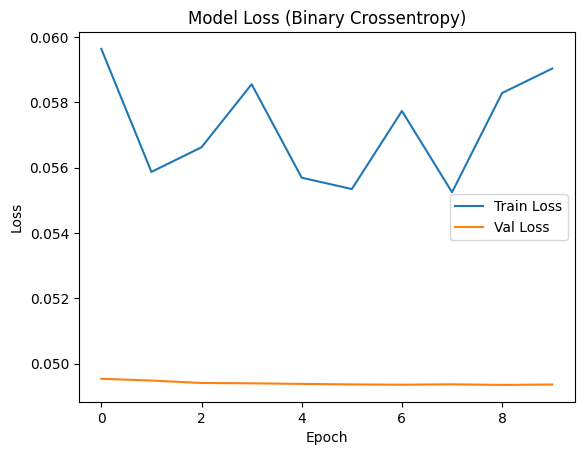

In [641]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss (Binary Crossentropy)')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()
